<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [MNIST1] - Simple classification with DNN
<!-- DESC --> An example of classification using a dense neural network for the famous MNIST dataset
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - Recognizing handwritten numbers
 - Understanding the principle of a classifier DNN network 
 - Implementation with Keras 


The [MNIST dataset](http://yann.lecun.com/exdb/mnist/) (Modified National Institute of Standards and Technology) is a must for Deep Learning.  
It consists of 60,000 small images of handwritten numbers for learning and 10,000 for testing.


## What we're going to do :

 - Retrieve data
 - Preparing the data
 - Create a model
 - Train the model
 - Evaluate the result


## Step 1 - Init python stuff

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import sys,os
from importlib import reload

sys.path.append('..')
import fidle.pwk as pwk

datasets_dir = pwk.init('MNIST1')

<br>**FIDLE 2020 - Practical Work Module**

Version              : 2.0.7
Notebook id          : MNIST1
Run time             : Tuesday 26 January 2021, 19:55:03
TensorFlow version   : 2.2.0
Keras version        : 2.3.0-tf
Datasets dir         : /home/pjluc/datasets/fidle
Run dir              : ./run
Update keras cache   : False
Save figs            : True
Path figs            : ./run/figs


## Step 2 - Retrieve data
MNIST is one of the most famous historic dataset.  
Include in [Keras datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28)
y_train :  (60000,)
x_test  :  (10000, 28, 28)
y_test  :  (10000,)


## Step 3 - Preparing the data

In [3]:
print('Before normalization : Min={}, max={}'.format(x_train.min(),x_train.max()))

xmax=x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax

print('After normalization  : Min={}, max={}'.format(x_train.min(),x_train.max()))

Before normalization : Min=0, max=255


After normalization  : Min=0.0, max=1.0


### Have a look

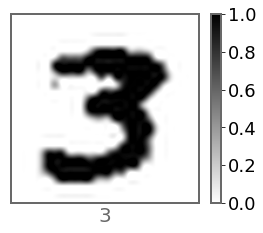

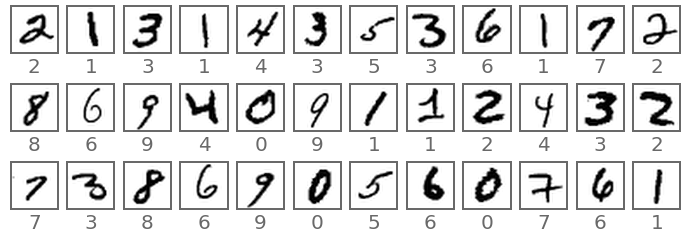

In [4]:
pwk.plot_images(x_train, y_train, [27],  x_size=5,y_size=5, colorbar=True, save_as='01-one-digit')
pwk.plot_images(x_train, y_train, range(5,41), columns=12, save_as='02-many-digits')

## Step 4 - Create model
About informations about : 
 - [Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
 - [Activation](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
 - [Loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
 - [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

In [5]:
hidden1     = 100
hidden2     = 100

model = keras.Sequential([
    keras.layers.Input((28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense( hidden1, activation='relu'),
    keras.layers.Dense( hidden2, activation='relu'),
    keras.layers.Dense( 10,      activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Step 5 - Train the model

In [6]:
batch_size  = 512
epochs      =  16

history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = 1,
                      validation_data = (x_test, y_test))

Epoch 1/16


  1/118 [..............................] - ETA: 0s - loss: 2.3436 - accuracy: 0.0879

 10/118 [=>............................] - ETA: 0s - loss: 1.9924 - accuracy: 0.4273

 21/118 [====>.........................] - ETA: 0s - loss: 1.5644 - accuracy: 0.5897

 33/118 [=======>......................] - ETA: 0s - loss: 1.2299 - accuracy: 0.6796

 45/118 [==========>...................] - ETA: 0s - loss: 1.0221 - accuracy: 0.7305

 57/118 [=============>................] - ETA: 0s - loss: 0.8874 - accuracy: 0.7631

 70/118 [================>.............] - ETA: 0s - loss: 0.7863 - accuracy: 0.7879

 83/118 [====================>.........] - ETA: 0s - loss: 0.7142 - accuracy: 0.8061

 96/118 [=======================>......] - ETA: 0s - loss: 0.6569 - accuracy: 0.8209

110/118 [==========================>...] - ETA: 0s - loss: 0.6077 - accuracy: 0.8338

118/118 [==============================] - 1s 6ms/step - loss: 0.5875 - accuracy: 0.8390 - val_loss: 0.2530 - val_accuracy: 0.9258


Epoch 2/16
  1/118 [..............................] - ETA: 0s - loss: 0.2364 - accuracy: 0.9238

 14/118 [==>...........................] - ETA: 0s - loss: 0.2427 - accuracy: 0.9297

 27/118 [=====>........................] - ETA: 0s - loss: 0.2347 - accuracy: 0.9324

 40/118 [=========>....................] - ETA: 0s - loss: 0.2388 - accuracy: 0.9323

 53/118 [============>.................] - ETA: 0s - loss: 0.2364 - accuracy: 0.9330

 66/118 [===============>..............] - ETA: 0s - loss: 0.2342 - accuracy: 0.9324

 79/118 [===================>..........] - ETA: 0s - loss: 0.2319 - accuracy: 0.9334

 92/118 [======================>.......] - ETA: 0s - loss: 0.2269 - accuracy: 0.9350

106/118 [=========================>....] - ETA: 0s - loss: 0.2247 - accuracy: 0.9357

118/118 [==============================] - 1s 5ms/step - loss: 0.2219 - accuracy: 0.9362 - val_loss: 0.1943 - val_accuracy: 0.9428


Epoch 3/16
  1/118 [..............................] - ETA: 0s - loss: 0.2017 - accuracy: 0.9316

 15/118 [==>...........................] - ETA: 0s - loss: 0.1780 - accuracy: 0.9480

 28/118 [======>.......................] - ETA: 0s - loss: 0.1737 - accuracy: 0.9498

 41/118 [=========>....................] - ETA: 0s - loss: 0.1742 - accuracy: 0.9495

 54/118 [============>.................] - ETA: 0s - loss: 0.1755 - accuracy: 0.9485

 67/118 [================>.............] - ETA: 0s - loss: 0.1735 - accuracy: 0.9493

 80/118 [===================>..........] - ETA: 0s - loss: 0.1709 - accuracy: 0.9504

 94/118 [======================>.......] - ETA: 0s - loss: 0.1694 - accuracy: 0.9511

108/118 [==========================>...] - ETA: 0s - loss: 0.1679 - accuracy: 0.9517

118/118 [==============================] - 1s 5ms/step - loss: 0.1661 - accuracy: 0.9522 - val_loss: 0.1471 - val_accuracy: 0.9581


Epoch 4/16
  1/118 [..............................] - ETA: 0s - loss: 0.1530 - accuracy: 0.9609

 14/118 [==>...........................] - ETA: 0s - loss: 0.1414 - accuracy: 0.9584

 27/118 [=====>........................] - ETA: 0s - loss: 0.1388 - accuracy: 0.9594

 40/118 [=========>....................] - ETA: 0s - loss: 0.1353 - accuracy: 0.9601

 54/118 [============>.................] - ETA: 0s - loss: 0.1320 - accuracy: 0.9607

 67/118 [================>.............] - ETA: 0s - loss: 0.1320 - accuracy: 0.9609

 80/118 [===================>..........] - ETA: 0s - loss: 0.1316 - accuracy: 0.9612

 94/118 [======================>.......] - ETA: 0s - loss: 0.1320 - accuracy: 0.9615

108/118 [==========================>...] - ETA: 0s - loss: 0.1317 - accuracy: 0.9615

118/118 [==============================] - 1s 4ms/step - loss: 0.1324 - accuracy: 0.9615 - val_loss: 0.1251 - val_accuracy: 0.9638


Epoch 5/16
  1/118 [..............................] - ETA: 0s - loss: 0.0849 - accuracy: 0.9805

 16/118 [===>..........................] - ETA: 0s - loss: 0.1111 - accuracy: 0.9684

 32/118 [=======>......................] - ETA: 0s - loss: 0.1112 - accuracy: 0.9684

 48/118 [===========>..................] - ETA: 0s - loss: 0.1106 - accuracy: 0.9684

 64/118 [===============>..............] - ETA: 0s - loss: 0.1115 - accuracy: 0.9677

 80/118 [===================>..........] - ETA: 0s - loss: 0.1108 - accuracy: 0.9678

 96/118 [=======================>......] - ETA: 0s - loss: 0.1107 - accuracy: 0.9681

112/118 [===========================>..] - ETA: 0s - loss: 0.1097 - accuracy: 0.9683

118/118 [==============================] - 0s 4ms/step - loss: 0.1093 - accuracy: 0.9685 - val_loss: 0.1139 - val_accuracy: 0.9662


Epoch 6/16
  1/118 [..............................] - ETA: 0s - loss: 0.1226 - accuracy: 0.9609

 14/118 [==>...........................] - ETA: 0s - loss: 0.0966 - accuracy: 0.9715

 29/118 [======>.......................] - ETA: 0s - loss: 0.0933 - accuracy: 0.9728

 45/118 [==========>...................] - ETA: 0s - loss: 0.0904 - accuracy: 0.9738

 60/118 [==============>...............] - ETA: 0s - loss: 0.0893 - accuracy: 0.9740

 76/118 [==================>...........] - ETA: 0s - loss: 0.0892 - accuracy: 0.9740

 91/118 [======================>.......] - ETA: 0s - loss: 0.0901 - accuracy: 0.9738

107/118 [==========================>...] - ETA: 0s - loss: 0.0913 - accuracy: 0.9736

118/118 [==============================] - 1s 4ms/step - loss: 0.0919 - accuracy: 0.9733 - val_loss: 0.1001 - val_accuracy: 0.9710


Epoch 7/16
  1/118 [..............................] - ETA: 0s - loss: 0.0752 - accuracy: 0.9785

 14/118 [==>...........................] - ETA: 0s - loss: 0.0832 - accuracy: 0.9756

 27/118 [=====>........................] - ETA: 0s - loss: 0.0799 - accuracy: 0.9771

 40/118 [=========>....................] - ETA: 0s - loss: 0.0801 - accuracy: 0.9772

 52/118 [============>.................] - ETA: 0s - loss: 0.0800 - accuracy: 0.9771

 65/118 [===============>..............] - ETA: 0s - loss: 0.0794 - accuracy: 0.9774

 79/118 [===================>..........] - ETA: 0s - loss: 0.0801 - accuracy: 0.9773

 92/118 [======================>.......] - ETA: 0s - loss: 0.0797 - accuracy: 0.9772

106/118 [=========================>....] - ETA: 0s - loss: 0.0798 - accuracy: 0.9772

118/118 [==============================] - 1s 6ms/step - loss: 0.0795 - accuracy: 0.9772 - val_loss: 0.0995 - val_accuracy: 0.9696


Epoch 8/16
  1/118 [..............................] - ETA: 0s - loss: 0.0725 - accuracy: 0.9785

 13/118 [==>...........................] - ETA: 0s - loss: 0.0802 - accuracy: 0.9769

 25/118 [=====>........................] - ETA: 0s - loss: 0.0755 - accuracy: 0.9777

 37/118 [========>.....................] - ETA: 0s - loss: 0.0715 - accuracy: 0.9787

 51/118 [===========>..................] - ETA: 0s - loss: 0.0697 - accuracy: 0.9790

 65/118 [===============>..............] - ETA: 0s - loss: 0.0689 - accuracy: 0.9793

 80/118 [===================>..........] - ETA: 0s - loss: 0.0711 - accuracy: 0.9786

 95/118 [=======================>......] - ETA: 0s - loss: 0.0705 - accuracy: 0.9789

111/118 [===========================>..] - ETA: 0s - loss: 0.0715 - accuracy: 0.9786

118/118 [==============================] - 1s 6ms/step - loss: 0.0714 - accuracy: 0.9787 - val_loss: 0.0928 - val_accuracy: 0.9712


Epoch 9/16
  1/118 [..............................] - ETA: 0s - loss: 0.0696 - accuracy: 0.9844

 13/118 [==>...........................] - ETA: 0s - loss: 0.0644 - accuracy: 0.9802

 25/118 [=====>........................] - ETA: 0s - loss: 0.0626 - accuracy: 0.9811

 38/118 [========>.....................] - ETA: 0s - loss: 0.0618 - accuracy: 0.9812

 52/118 [============>.................] - ETA: 0s - loss: 0.0631 - accuracy: 0.9813

 66/118 [===============>..............] - ETA: 0s - loss: 0.0635 - accuracy: 0.9810

 80/118 [===================>..........] - ETA: 0s - loss: 0.0633 - accuracy: 0.9809

 96/118 [=======================>......] - ETA: 0s - loss: 0.0626 - accuracy: 0.9814

112/118 [===========================>..] - ETA: 0s - loss: 0.0625 - accuracy: 0.9816

118/118 [==============================] - 1s 6ms/step - loss: 0.0626 - accuracy: 0.9816 - val_loss: 0.0890 - val_accuracy: 0.9736


Epoch 10/16
  1/118 [..............................] - ETA: 0s - loss: 0.0454 - accuracy: 0.9883

 14/118 [==>...........................] - ETA: 0s - loss: 0.0504 - accuracy: 0.9854

 27/118 [=====>........................] - ETA: 0s - loss: 0.0479 - accuracy: 0.9872

 40/118 [=========>....................] - ETA: 0s - loss: 0.0476 - accuracy: 0.9867

 53/118 [============>.................] - ETA: 0s - loss: 0.0500 - accuracy: 0.9860

 66/118 [===============>..............] - ETA: 0s - loss: 0.0505 - accuracy: 0.9858

 80/118 [===================>..........] - ETA: 0s - loss: 0.0515 - accuracy: 0.9856

 94/118 [======================>.......] - ETA: 0s - loss: 0.0521 - accuracy: 0.9852

108/118 [==========================>...] - ETA: 0s - loss: 0.0524 - accuracy: 0.9851

118/118 [==============================] - 1s 6ms/step - loss: 0.0528 - accuracy: 0.9850 - val_loss: 0.0837 - val_accuracy: 0.9748


Epoch 11/16
  1/118 [..............................] - ETA: 0s - loss: 0.0274 - accuracy: 0.9980

 13/118 [==>...........................] - ETA: 0s - loss: 0.0420 - accuracy: 0.9887

 25/118 [=====>........................] - ETA: 0s - loss: 0.0437 - accuracy: 0.9879

 38/118 [========>.....................] - ETA: 0s - loss: 0.0454 - accuracy: 0.9870

 51/118 [===========>..................] - ETA: 0s - loss: 0.0457 - accuracy: 0.9869

 64/118 [===============>..............] - ETA: 0s - loss: 0.0460 - accuracy: 0.9866

 78/118 [==================>...........] - ETA: 0s - loss: 0.0481 - accuracy: 0.9859

 92/118 [======================>.......] - ETA: 0s - loss: 0.0479 - accuracy: 0.9860

106/118 [=========================>....] - ETA: 0s - loss: 0.0482 - accuracy: 0.9860

118/118 [==============================] - 1s 6ms/step - loss: 0.0478 - accuracy: 0.9861 - val_loss: 0.0800 - val_accuracy: 0.9753


Epoch 12/16
  1/118 [..............................] - ETA: 0s - loss: 0.0699 - accuracy: 0.9805

 15/118 [==>...........................] - ETA: 0s - loss: 0.0412 - accuracy: 0.9865

 28/118 [======>.......................] - ETA: 0s - loss: 0.0390 - accuracy: 0.9877

 42/118 [=========>....................] - ETA: 0s - loss: 0.0385 - accuracy: 0.9885

 55/118 [============>.................] - ETA: 0s - loss: 0.0383 - accuracy: 0.9887

 68/118 [================>.............] - ETA: 0s - loss: 0.0382 - accuracy: 0.9889

 81/118 [===================>..........] - ETA: 0s - loss: 0.0394 - accuracy: 0.9885

 95/118 [=======================>......] - ETA: 0s - loss: 0.0411 - accuracy: 0.9881

109/118 [==========================>...] - ETA: 0s - loss: 0.0415 - accuracy: 0.9880

118/118 [==============================] - 1s 4ms/step - loss: 0.0416 - accuracy: 0.9878 - val_loss: 0.0823 - val_accuracy: 0.9747


Epoch 13/16


  1/118 [..............................] - ETA: 0s - loss: 0.0531 - accuracy: 0.9824

 15/118 [==>...........................] - ETA: 0s - loss: 0.0390 - accuracy: 0.9884

 29/118 [======>.......................] - ETA: 0s - loss: 0.0361 - accuracy: 0.9901

 43/118 [=========>....................] - ETA: 0s - loss: 0.0362 - accuracy: 0.9900

 57/118 [=============>................] - ETA: 0s - loss: 0.0372 - accuracy: 0.9891

 71/118 [=================>............] - ETA: 0s - loss: 0.0381 - accuracy: 0.9886

 85/118 [====================>.........] - ETA: 0s - loss: 0.0377 - accuracy: 0.9889

 97/118 [=======================>......] - ETA: 0s - loss: 0.0382 - accuracy: 0.9886

109/118 [==========================>...] - ETA: 0s - loss: 0.0381 - accuracy: 0.9887

118/118 [==============================] - 1s 4ms/step - loss: 0.0379 - accuracy: 0.9887 - val_loss: 0.0822 - val_accuracy: 0.9739


Epoch 14/16
  1/118 [..............................] - ETA: 0s - loss: 0.0312 - accuracy: 0.9883

 13/118 [==>...........................] - ETA: 0s - loss: 0.0328 - accuracy: 0.9905

 27/118 [=====>........................] - ETA: 0s - loss: 0.0309 - accuracy: 0.9911

 42/118 [=========>....................] - ETA: 0s - loss: 0.0329 - accuracy: 0.9906

 57/118 [=============>................] - ETA: 0s - loss: 0.0323 - accuracy: 0.9908

 71/118 [=================>............] - ETA: 0s - loss: 0.0328 - accuracy: 0.9905

 86/118 [====================>.........] - ETA: 0s - loss: 0.0327 - accuracy: 0.9907

102/118 [========================>.....] - ETA: 0s - loss: 0.0331 - accuracy: 0.9906

118/118 [==============================] - ETA: 0s - loss: 0.0333 - accuracy: 0.9903

118/118 [==============================] - 0s 4ms/step - loss: 0.0333 - accuracy: 0.9903 - val_loss: 0.0859 - val_accuracy: 0.9743


Epoch 15/16
  1/118 [..............................] - ETA: 0s - loss: 0.0274 - accuracy: 0.9883

 16/118 [===>..........................] - ETA: 0s - loss: 0.0331 - accuracy: 0.9910

 31/118 [======>.......................] - ETA: 0s - loss: 0.0308 - accuracy: 0.9918

 47/118 [==========>...................] - ETA: 0s - loss: 0.0293 - accuracy: 0.9924

 62/118 [==============>...............] - ETA: 0s - loss: 0.0293 - accuracy: 0.9927

 76/118 [==================>...........] - ETA: 0s - loss: 0.0292 - accuracy: 0.9927

 90/118 [=====================>........] - ETA: 0s - loss: 0.0296 - accuracy: 0.9923

101/118 [========================>.....] - ETA: 0s - loss: 0.0300 - accuracy: 0.9921

113/118 [===========================>..] - ETA: 0s - loss: 0.0304 - accuracy: 0.9919

118/118 [==============================] - 1s 4ms/step - loss: 0.0306 - accuracy: 0.9919 - val_loss: 0.0813 - val_accuracy: 0.9766


Epoch 16/16
  1/118 [..............................] - ETA: 0s - loss: 0.0256 - accuracy: 0.9961

 14/118 [==>...........................] - ETA: 0s - loss: 0.0277 - accuracy: 0.9915

 27/118 [=====>........................] - ETA: 0s - loss: 0.0263 - accuracy: 0.9926

 40/118 [=========>....................] - ETA: 0s - loss: 0.0267 - accuracy: 0.9927

 53/118 [============>.................] - ETA: 0s - loss: 0.0266 - accuracy: 0.9927

 66/118 [===============>..............] - ETA: 0s - loss: 0.0264 - accuracy: 0.9928

 79/118 [===================>..........] - ETA: 0s - loss: 0.0272 - accuracy: 0.9925

 92/118 [======================>.......] - ETA: 0s - loss: 0.0272 - accuracy: 0.9926

105/118 [=========================>....] - ETA: 0s - loss: 0.0272 - accuracy: 0.9926

118/118 [==============================] - 1s 4ms/step - loss: 0.0270 - accuracy: 0.9926 - val_loss: 0.0832 - val_accuracy: 0.9744


## Step 6 - Evaluate
### 6.1 - Final loss and accuracy

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss     :', score[0])
print('Test accuracy :', score[1])

Test loss     : 0.08315477520227432
Test accuracy : 0.974399983882904


### 6.2 - Plot history

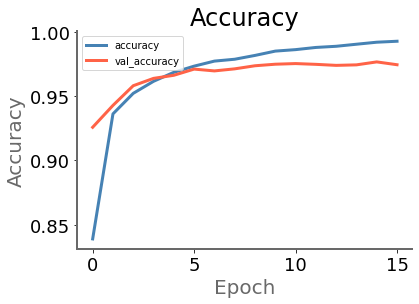

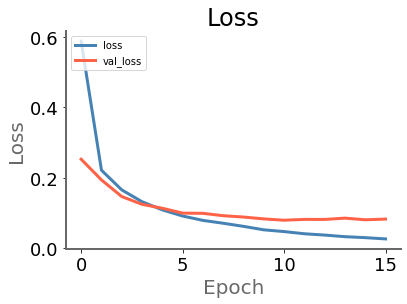

In [8]:
pwk.plot_history(history, figsize=(6,4), save_as='03-history')

### 6.3 - Plot results

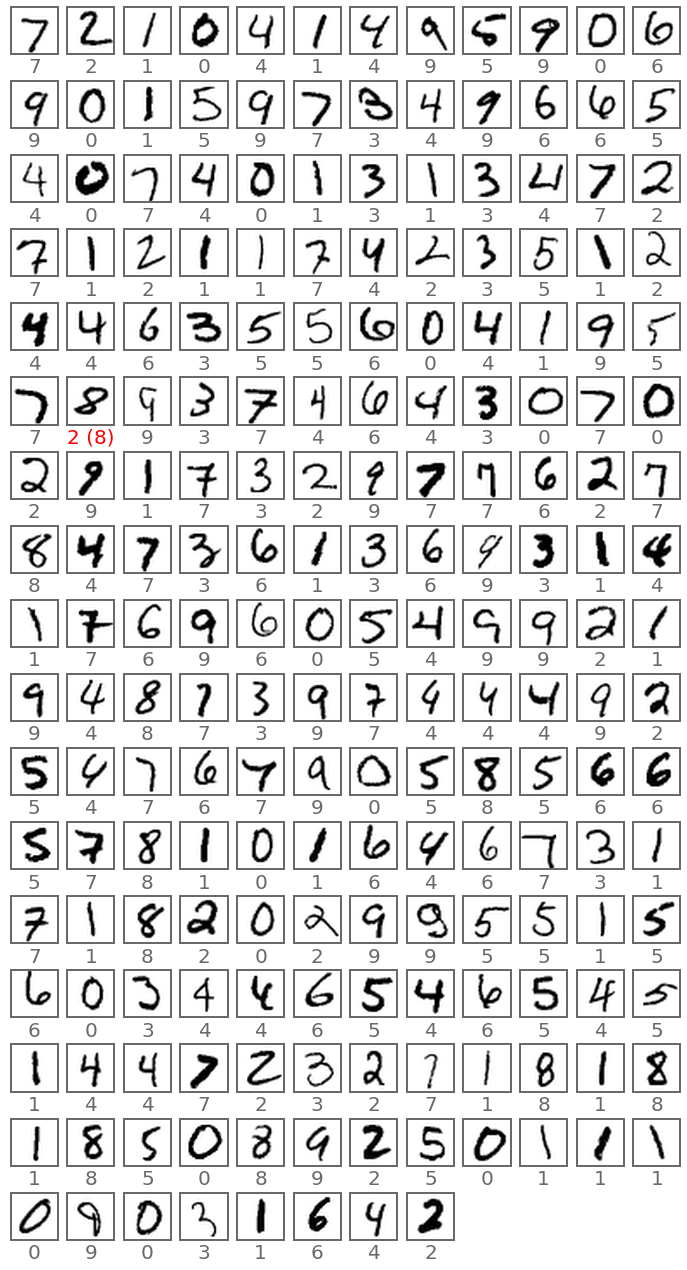

In [9]:
#y_pred   = model.predict_classes(x_test)           Deprecated after 01/01/2021 !!

y_sigmoid = model.predict(x_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)

pwk.plot_images(x_test, y_test, range(0,200), columns=12, x_size=1, y_size=1, y_pred=y_pred, save_as='04-predictions')

### 6.4 - Plot some errors

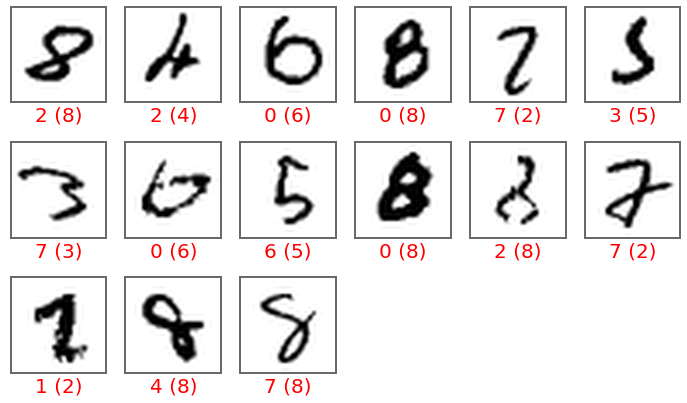

In [10]:
errors=[ i for i in range(len(x_test)) if y_pred[i]!=y_test[i] ]
errors=errors[:min(24,len(errors))]
pwk.plot_images(x_test, y_test, errors[:15], columns=6, x_size=2, y_size=2, y_pred=y_pred, save_as='05-some-errors')

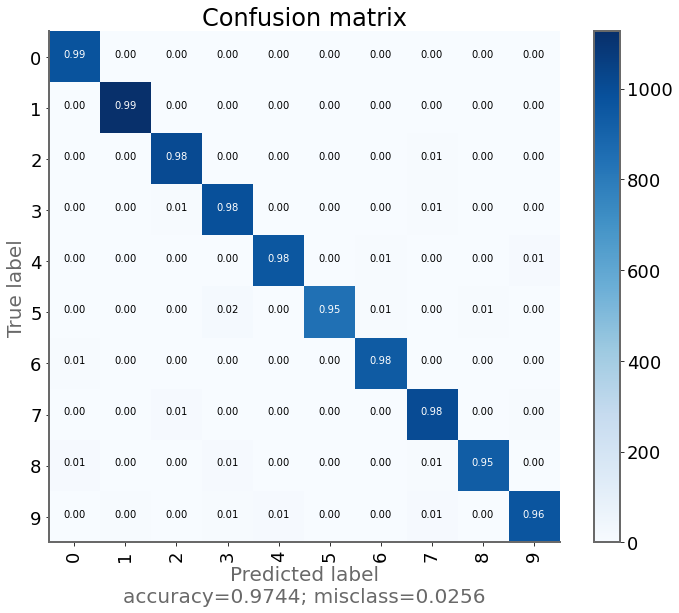

In [11]:
pwk.plot_confusion_matrix(y_test,y_pred,range(10),normalize=True, save_as='06-confusion-matrix')

In [12]:
pwk.end()

End time is : Tuesday 26 January 2021, 19:55:40
Duration is : 00:00:37 948ms
This notebook ends here


<div class="todo">
    A few things you can do for fun:
    <ul>
        <li>Changing the network architecture (layers, number of neurons, etc.)</li>
        <li>Display a summary of the network</li>
        <li>Retrieve and display the softmax output of the network, to evaluate its "doubts".</li>
    </ul>
</div>

---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>